In [276]:
import matplotlib.pyplot as plt 
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import AveragePooling2D
from keras.applications import VGG16
from keras.layers import Flatten
from keras.layers import Input
from keras.layers import Dropout
from keras.layers import Dense
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import numpy as np 
import cv2
import os
from imutils import paths
import cv2
import matplotlib.pyplot as plt
import skimage
from skimage.transform import resize
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

![](VGG16.jpg)
# VGG16 is a convolutional neural network that has 16 layers. It has been trained  on more than a million images on the ImageNet database. We will use transfer learning to train the VGG16 model on our dataset of COVID-19 and Normal X-ray images. 

In [1]:
files = r'/Users/irtaza/Desktop/COVID19XRAYDETECTION/Data'

In [2]:
args = {}
args["files"]=files
args

{'files': '/Users/irtaza/Desktop/COVID19XRAYDETECTION/Data'}

In [279]:
datalist = list(paths.list_images(args['files']))
pictures = []
category = []

for i in datalist:
  image = cv2.cvtColor(cv2.imread(i),cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(224,224))
  pictures.append(image)

  category.append(i.split(os.path.sep)[-2])
pictures = np.array(pictures)/255.0
category = np.array(category)

# All the images are in different size resolutions. We need all of them to be the same size in order for the CNN model to be fair across all images and to increase our accuracy. So we resize our images to be 224x224. We also reduce the size of our data by a factor of 255 so that the data can fit into the CNN model easily. We use 255 because the maximum value of any pixel is 255.

In [280]:
image.shape

(224, 224, 3)

In [281]:
pictures[0]

array([[[0.58039216, 0.58039216, 0.58039216],
        [0.58823529, 0.58823529, 0.58823529],
        [0.60392157, 0.60392157, 0.60392157],
        ...,
        [0.35686275, 0.35686275, 0.35686275],
        [0.36470588, 0.36470588, 0.36470588],
        [0.50980392, 0.50980392, 0.50980392]],

       [[0.51764706, 0.51764706, 0.51764706],
        [0.5372549 , 0.5372549 , 0.5372549 ],
        [0.57254902, 0.57254902, 0.57254902],
        ...,
        [0.36078431, 0.36078431, 0.36078431],
        [0.36862745, 0.36862745, 0.36862745],
        [0.43921569, 0.43921569, 0.43921569]],

       [[0.47058824, 0.47058824, 0.47058824],
        [0.49019608, 0.49019608, 0.49019608],
        [0.52941176, 0.52941176, 0.52941176],
        ...,
        [0.37254902, 0.37254902, 0.37254902],
        [0.34901961, 0.34901961, 0.34901961],
        [0.36078431, 0.36078431, 0.36078431]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0

In [282]:
category

array(['Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Norm

In [283]:
def comparison(i):
    negative = cv2.imread(r'/Users/irtaza/Desktop/COVID19XRAYDETECTION/Data'+"/Normal//"+os.listdir(dataset+"/Normal")[i])
    negative = skimage.transform.resize(negative, (150,150,3))
    positive = cv2.imread(r'/Users/irtaza/Desktop/COVID19XRAYDETECTION/Data'+"/Covid//"+os.listdir(dataset+"/Covid")[i])
    positive = skimage.transform.resize(positive, (150,150,3), mode = 'reflect')
    print("X-ray of Patient with COVID-19 vs X-ray of Patient not having COVID-19")
    plt.figure(figsize = (10,10))
    plt.imshow(np.concatenate((positive, negative), axis =1))
    plt.show()

X-ray of Patient with COVID-19 vs X-ray of Patient not having COVID-19


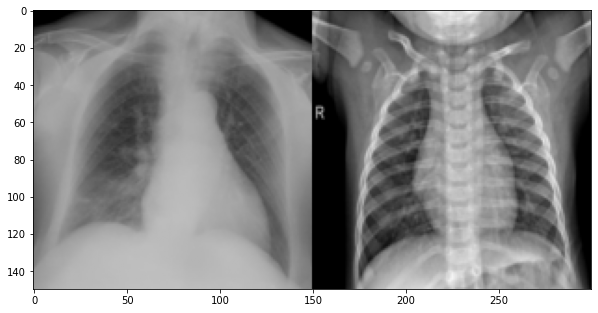

X-ray of Patient with COVID-19 vs X-ray of Patient not having COVID-19


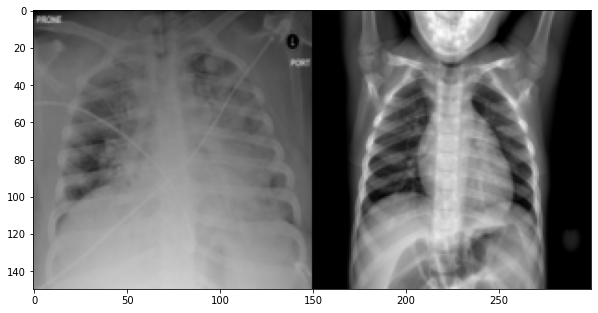

X-ray of Patient with COVID-19 vs X-ray of Patient not having COVID-19


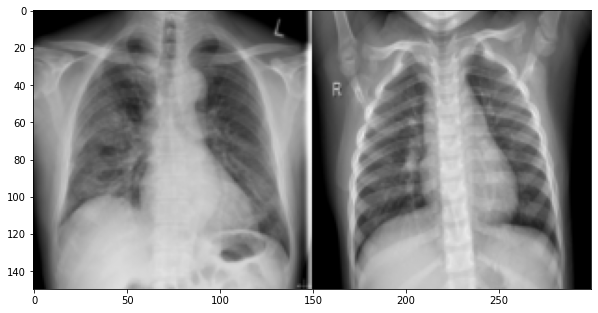

X-ray of Patient with COVID-19 vs X-ray of Patient not having COVID-19


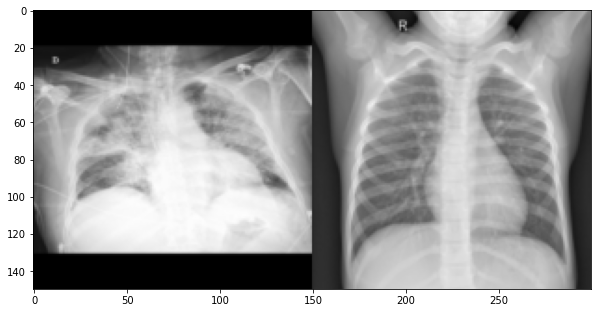

X-ray of Patient with COVID-19 vs X-ray of Patient not having COVID-19


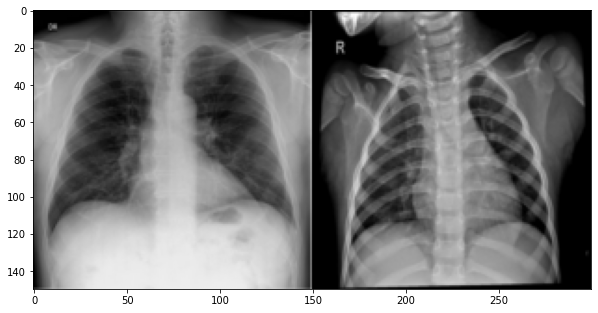

In [284]:
for i in range (0,5):
    comparison(i) 

In [285]:
LB = LabelBinarizer()

category = LB.fit_transform(category)

# Currently, we have the data stored as COVID or Normal. We can change this to binary values of 0 and 1 where 0 represents having COVID and 1 represents being Normal

In [286]:
category = to_categorical(category)

In [287]:
xtrain,xtest,ytrain,ytest = train_test_split(pictures,category,random_state=100,test_size=0.2,stratify=category)


# We will now split our data into testing and training. 80% of our data will be used to train the CNN model and 20% will be used to test the accuracy of the model. We stratify our data set on the basis of the labels. So e.g. if the data set consists of 75% of 0s and 25% of 1s, the stratify method will make sure that the random split also consists of 75% of 0s and 25% of 1s. 

In [288]:

trainAug = ImageDataGenerator(rotation_range=15,fill_mode='nearest')
 

# In order to improve accuracy, we will artificially increase the size of the dataset by creating modified versions of the images present in the data set using the ImageDataGenerator. A rotation range of 15 implies that from one image in the dataset, we want two images. 

In [289]:
trainAug

![](pretrained.jpeg)
# The VGG16 model has been trained by millions of images, the second last section labeled "Nanonet" represents our dataset which we will feed to the VGG16 model and then we will get output of COVID or Normal 

In [290]:
pretrainedmodel = VGG16(weights='imagenet',include_top=False,input_tensor=Input((224,224,3)))


![](architecture.png)
# The pretrained model acts as a feature extractor, it will extract the pixels from the images, and it will then finetune our custom layer so now we create our custom layers. 

In [291]:
newmodel = pretrainedmodel .output
newmodel=AveragePooling2D((4,4))(pretrainedmodel .output)
newmodel = Flatten(name='flatten')(AveragePooling2D((4,4))(pretrainedmodel .output))
newmodel = Dense(64,activation='relu')(Flatten(name='flatten')(AveragePooling2D((4,4))(pretrainedmodel .output)))
newmodel = Dropout(0.5)(newmodel)
newmodel = Dense(2,activation='softmax')(newmodel)

finalmodel = Model(pretrainedmodel.input,newmodel)


![](avgpooling.png)
# By using AveragePooling2D, the learnable weights layer will take the average of the data stored in the pretrained weights layer.
![](flatten.png)
# The flatten method converts our data of into a single 1 dimensional array and can now be input into the next layer.  
![](relu.png)
# Every neuron has some kind of data to process for the output. If the quality of the data crosses a threshold value, only then will the neuron process the data, the other neurons will not process it. So only the neuron that is best trained will give the output. So to set a threshold value, we use the activation function.

# We use the Dropout function to prevent overfitting of data. We have 2 ouputs, COVID or Normal so our Dense layer will have an output of 2 units. 

# We do not want our pretrained model to start training again so we initialize layer.trainable to False

In [325]:
for layer in pretrainedmodel.layers:
  layer.trainable=False

In [292]:
finalmodel.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [310]:
opt = Adam(lr=1e-3, decay=1e-3 / 10)
finalmodel.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])
R = finalmodel.fit_generator(
    trainAug.flow(xtrain, ytrain, batch_size=10),
    steps_per_epoch=len(xtrain) // 10,
    validation_data=(xtest, ytest),
    
    epochs=10)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
16/16 [==============================] - 70s 4s/step - loss: 0.5711 - accuracy: 0.7290 - val_loss: 0.5502 - val_accuracy: 0.9250
Epoch 2/10
16/16 [==============================] - 99s 6s/step - loss: 0.5725 - accuracy: 0.7161 - val_loss: 0.4868 - val_accuracy: 0.9250
Epoch 3/10
16/16 [==============================] - 65s 4s/step - loss: 0.5164 - accuracy: 0.7734 - val_loss: 0.4305 - val_accuracy: 1.0000
Epoch 4/10
16/16 [==============================] - 61s 4s/step - loss: 0.4058 - accuracy: 0.9096 - val_loss: 0.3785 - val_accuracy: 0.9500
Epoch 5/10
16/16 [==============================] - 60s 4s/step - loss: 0.3972 - accuracy: 0.8861 - val_loss: 0.3301 - val_accuracy: 1.0000
Epoch 6/10
16/16 [==============================] - 61s 4s/step - loss: 0.3337 - accuracy: 0.9475 - val_loss: 0.2897 - val_accuracy: 0.9750
Epoch 7/10
16/16 [==============================] - 59s 4s/step - loss: 0.3011 - accuracy: 0.9619 - val_loss: 0.2602 - val_accuracy: 1.0000
Epoch 8/10
16/16 [==

# Learning Rate is defined as the rate at how fast a neural network can update the concepts that it has learned. A learning rate of 1e-3 is an optimal learning rate for our dataset. EPOCHS = 10 means that the algorithm will go through the dataset 10 times. We define our batch size to be 10. This means that 10 training examples will be used in each dataset.

In [312]:
from sklearn.metrics import classification_report
y_pred = model.predict(xtest, batch_size=10)
y_pred = np.argmax(y_pred, axis=1)


In [313]:
print(classification_report(ytest.argmax(axis=1), y_pred,target_names=LB.classes_))

              precision    recall  f1-score   support

       Covid       1.00      1.00      1.00        20
      Normal       1.00      1.00      1.00        20

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [314]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest.argmax(axis=1),y_pred)

1.0

In [315]:
accuracypercentage = accuracy_score(ytest.argmax(axis=1),y_pred) * 100
print (accuracypercentage)

100.0


# The model is 100% accurate on the test data set

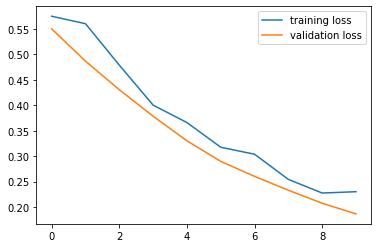

In [316]:
plt.plot(R.history['loss'], label='training loss')
plt.plot(R.history['val_loss'], label='validation loss')
plt.legend()
plt.show()


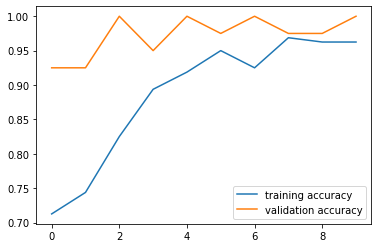

In [317]:
plt.plot(R.history['accuracy'], label='training accuracy')
plt.plot(R.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

In [318]:
finalmodel.save('finalmodel.h5')

In [319]:
def predictor(path):
  from keras.preprocessing import image
  import tensorflow as tf 
  model2 = tf.keras.models.load_model('finalmodel.h5')
  from keras.applications.vgg16 import preprocess_input
  imgplot = plt.imshow(image.load_img(str(path), target_size=(224, 224)))
  predictionval = np.argmax(model2.predict(preprocess_input(np.expand_dims(image.img_to_array(image.load_img(str(path), target_size=(224, 224))), axis=0))), axis=1)
  if predictionval==[1]:
    print('Prediction: This patient is normal, they do not have COVID-19')
  else:
    print('Prediction: This patient has COVID-19')





Prediction: This patient has COVID-19


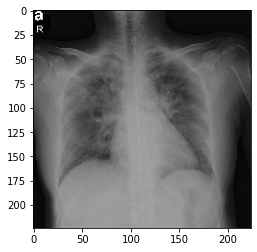

In [320]:
predictor('/Users/irtaza/Desktop/COVID19XRAYDETECTION/Data/Covid/1-s2.0-S0929664620300449-gr2_lrg-a.jpg')

Prediction: This patient is normal, they do not have COVID-19


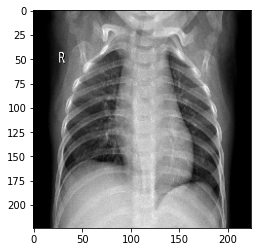

In [321]:
predictor('/Users/irtaza/Desktop/COVID19XRAYDETECTION/Data/Normal/IM-0291-0001.jpeg')